In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sv_functions import angle_2D, R1, R2, R3, angle_3D

%matplotlib widget

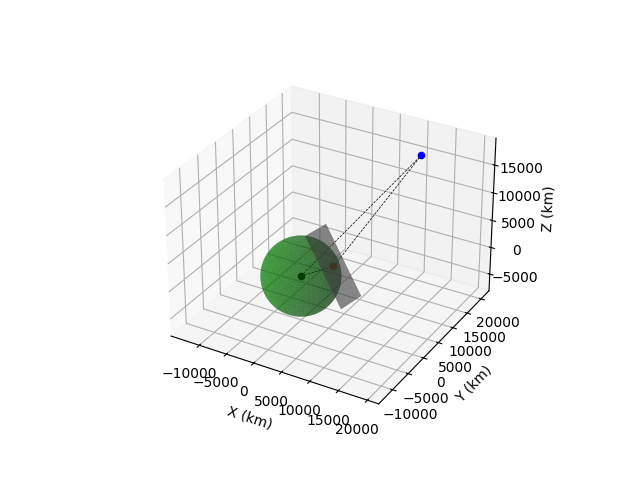

In [3]:
R = 6371 # km
N = 50
# define Origo
O = np.zeros(3)
# create Earth
theta = np.linspace(0,2*np.pi,N)
phi = np.linspace(0,np.pi,N)
# define x y z for Earth
x = R * np.outer(
    np.cos(theta),
    np.sin(phi)
)
y = R * np.outer(
    np.sin(theta),
    np.sin(phi)
)
z = R * np.outer(
    np.ones(np.size(theta)),
    np.cos(phi)
)
# define receiver
r = np.array([R-754,500,R/2])
# define satellite
s1 = np.array([13000,15000,18000])

## find perpendicular plane
# calculate direction vector
perp_vec = r

# Define the coefficients of the plane equation (ax + by + cz = d)
a, b, c = perp_vec
d = np.dot(perp_vec, r)

# Define a grid of points for plotting the plane
x_grid, y_grid = np.meshgrid(np.linspace(r[0]-R/2, r[0]+R/2, N), np.linspace(r[1]-R/2, r[1]+R/2, N))
z_grid = (-a * x_grid - b * y_grid + d) / c


plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# plot earth
ax.plot_surface(x,y,z,color='green',alpha=0.5)
# plot receiver location
ax.scatter3D(r[0],r[1],r[2],color='red')
ax.scatter3D(s1[0],s1[1],s1[2],color='blue')
ax.scatter3D(O[0],O[1],O[2],color='black')
# plot lines between receiver, origo and satellite 1
ax.plot([O[0], r[0]], [O[1], r[1]], [O[2], r[2]], 'k--', linewidth=0.5)
ax.plot([O[0], s1[0]], [O[1], s1[1]], [O[2], s1[2]], 'k--', linewidth=0.5)
ax.plot([r[0], s1[0]], [r[1], s1[1]], [r[2], s1[2]], 'k--', linewidth=0.5)
# plot perpendicular plane
ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.8,color='gray')

# set labels
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
# set equal ratios in plot
ax.axis('equal')

plt.show()

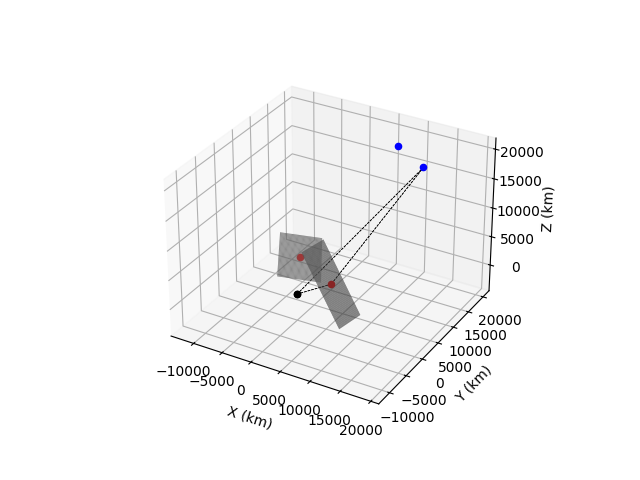

In [9]:
## Rotate the perpendicular plane to lie flat on z-axis - not done!

R = 6371 # km
N = 50
# define Origo
O = np.zeros(3)

# define receiver
r = np.array([R-754,500,R/2])
# define satellite
s1 = np.array([13000,15000,18000])

## find perpendicular plane
# calculate direction vector
perp_vec = r

# Define the coefficients of the plane equation (ax + by + cz = d)
a, b, c = perp_vec
d = np.dot(perp_vec, r)

# Define a grid of points for plotting the plane
x_grid, y_grid = np.meshgrid(np.linspace(r[0]-R/2, r[0]+R/2, N), np.linspace(r[1]-R/2, r[1]+R/2, N))
z_grid = (-a * x_grid - b * y_grid + d) / c

## find rotation
# define upward vector
O_n = O.copy()
O_n[-1] = 1

angle_n = np.linalg.norm(np.cross(perp_vec,O_n))
angle_n = angle_n / (np.linalg.norm(perp_vec) * np.linalg.norm(O_n))
angle_n = np.arcsin(angle_n)

R_L = R3(angle_n)@R2(angle_n)

r_rot = np.dot(R_L,r)
s1_rot = np.dot(R_L,s1)

rotated_points = np.dot(R_L, np.array([x_grid.flatten(), y_grid.flatten(), z_grid.flatten()]))
x_grid_rot = rotated_points[0].reshape(x_grid.shape)
y_grid_rot = rotated_points[1].reshape(y_grid.shape)
z_grid_rot = rotated_points[2].reshape(z_grid.shape)

plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot receiver location
ax.scatter3D(r[0],r[1],r[2],color='red')
# plot satellite location
ax.scatter3D(s1[0],s1[1],s1[2],color='blue')
# plot origo
ax.scatter3D(O[0],O[1],O[2],color='black')
# plot lines between receiver, origo and satellite 1
ax.plot([O[0], r[0]], [O[1], r[1]], [O[2], r[2]], 'k--', linewidth=0.5)
ax.plot([O[0], s1[0]], [O[1], s1[1]], [O[2], s1[2]], 'k--', linewidth=0.5)
ax.plot([r[0], s1[0]], [r[1], s1[1]], [r[2], s1[2]], 'k--', linewidth=0.5)
# plot perpendicular plane
ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.8,color='gray') 

# plot rotated receiver location
ax.scatter3D(r_rot[0],r_rot[1],r_rot[2],color='red')
# plot rotated satellite location
ax.scatter3D(s1_rot[0],s1_rot[1],s1_rot[2],color='blue')
ax.scatter3D(O[0],O[1],O[2],color='black')
# plot lines between receiver, origo and satellite 1
ax.plot([O[0], r[0]], [O[1], r[1]], [O[2], r[2]], 'k--', linewidth=0.5)
ax.plot([O[0], s1[0]], [O[1], s1[1]], [O[2], s1[2]], 'k--', linewidth=0.5)
ax.plot([r[0], s1[0]], [r[1], s1[1]], [r[2], s1[2]], 'k--', linewidth=0.5)
# plot rotated perpendicular plane
ax.plot_surface(x_grid_rot, y_grid_rot, z_grid_rot, alpha=0.8, color='gray')

# set labels
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
# set equal ratios in plot
ax.axis('equal')

plt.show()

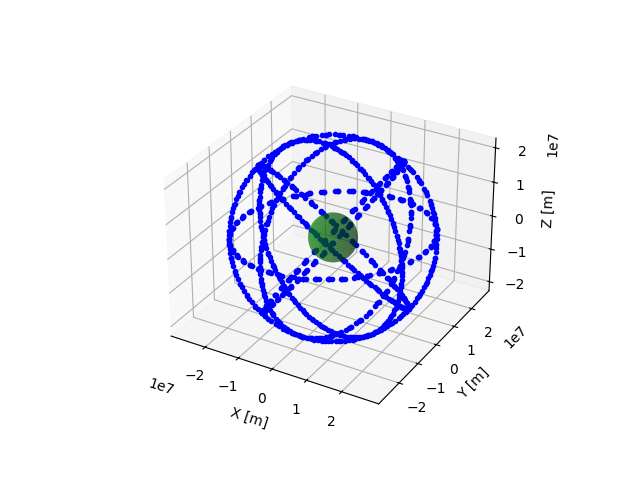

In [4]:
# constants
gpsPi = np.pi  # Pi used in the GPS coordinate system
GM = 3.986005e14  # Universal gravitational constant times the mass of the Earth, [m^3/s^2]
a = 26559800  # [m] semi-major axis

# Satellite parameters
Satellites = [
    {'Name': 'A1', 'e': 0.0, 'i': 55.0, 'Omega': 272.85, 'omega': 0.0, 'Mean_Anomaly': 268.13},
    {'Name': 'A2', 'e': 0.0, 'i': 55.0, 'Omega': 272.85, 'omega': 0.0, 'Mean_Anomaly': 161.79},
    {'Name': 'A3', 'e': 0.0, 'i': 55.0, 'Omega': 272.85, 'omega': 0.0, 'Mean_Anomaly': 11.68},
    {'Name': 'A4', 'e': 0.0, 'i': 55.0, 'Omega': 272.85, 'omega': 0.0, 'Mean_Anomaly': 41.81},
    {'Name': 'B1', 'e': 0.0, 'i': 55.0, 'Omega': 332.85, 'omega': 0.0, 'Mean_Anomaly': 80.96},
    {'Name': 'B2', 'e': 0.0, 'i': 55.0, 'Omega': 332.85, 'omega': 0.0, 'Mean_Anomaly': 173.34},
    {'Name': 'B3', 'e': 0.0, 'i': 55.0, 'Omega': 332.85, 'omega': 0.0, 'Mean_Anomaly': 309.98},
    {'Name': 'B4', 'e': 0.0, 'i': 55.0, 'Omega': 332.85, 'omega': 0.0, 'Mean_Anomaly': 204.38},
    {'Name': 'C1', 'e': 0.0, 'i': 55.0, 'Omega': 32.85, 'omega': 0.0, 'Mean_Anomaly': 111.88},
    {'Name': 'C2', 'e': 0.0, 'i': 55.0, 'Omega': 32.85, 'omega': 0.0, 'Mean_Anomaly': 11.80},
    {'Name': 'C3', 'e': 0.0, 'i': 55.0, 'Omega': 32.85, 'omega': 0.0, 'Mean_Anomaly': 339.67},
    {'Name': 'C4', 'e': 0.0, 'i': 55.0, 'Omega': 32.85, 'omega': 0.0, 'Mean_Anomaly': 241.57},
    {'Name': 'D1', 'e': 0.0, 'i': 55.0, 'Omega': 92.85, 'omega': 0.0, 'Mean_Anomaly': 135.27},
    {'Name': 'D2', 'e': 0.0, 'i': 55.0, 'Omega': 92.85, 'omega': 0.0, 'Mean_Anomaly': 265.45},
    {'Name': 'D3', 'e': 0.0, 'i': 55.0, 'Omega': 92.85, 'omega': 0.0, 'Mean_Anomaly': 35.16},
    {'Name': 'D4', 'e': 0.0, 'i': 55.0, 'Omega': 92.85, 'omega': 0.0, 'Mean_Anomaly': 167.36},
    {'Name': 'E1', 'e': 0.0, 'i': 55.0, 'Omega': 152.85, 'omega': 0.0, 'Mean_Anomaly': 197.05},
    {'Name': 'E2', 'e': 0.0, 'i': 55.0, 'Omega': 152.85, 'omega': 0.0, 'Mean_Anomaly': 302.60},
    {'Name': 'E3', 'e': 0.0, 'i': 55.0, 'Omega': 152.85, 'omega': 0.0, 'Mean_Anomaly': 66.07},
    {'Name': 'E4', 'e': 0.0, 'i': 55.0, 'Omega': 152.85, 'omega': 0.0, 'Mean_Anomaly': 333.69},
    {'Name': 'F1', 'e': 0.0, 'i': 55.0, 'Omega': 212.85, 'omega': 0.0, 'Mean_Anomaly': 238.89},
    {'Name': 'F2', 'e': 0.0, 'i': 55.0, 'Omega': 212.85, 'omega': 0.0, 'Mean_Anomaly': 345.23},
    {'Name': 'F3', 'e': 0.0, 'i': 55.0, 'Omega': 212.85, 'omega': 0.0, 'Mean_Anomaly': 105.21},
    {'Name': 'F4', 'e': 0.0, 'i': 55.0, 'Omega': 212.85, 'omega': 0.0, 'Mean_Anomaly': 135.35}
]

# Simulation parameters
t0 = 0  # start-time
t1 = 12 * 3600  # stop-time
dt = 3600 / 4  # simulation time-step (here 15 minutes)
t = np.arange(t0, t1 + dt, dt)
n = np.sqrt(GM) * (a ** (-3 / 2))

rxt = np.zeros((len(Satellites), 3, len(t)))  # 3d-array to store positions for all 24 SV at each time instant
k = 0
for j in Satellites:  # loop through each SV
    for i in range(len(t)):  # loop through each time-instant
        # Calculate updated anomaly
        M = n * (t[i] - t0) + j['Mean_Anomaly'] * np.pi / 180
        E = M
        iter_max = 1000

        for ii in range(iter_max):
            E_old = E
            E = M + j['e'] * np.sin(E)
            dE = np.remainder(E - E_old, 2 * gpsPi)
            if np.abs(dE) < 1.e-12:
                # Necessary precision is reached, exit from the loop
                break

        r_q = np.array([a * np.cos(E) - a * j['e'], a * np.sqrt(1 - j['e'] ** 2) * np.sin(E), 0])

        # Calculate orbital and ECI coordinates
        R_xq = np.dot(R3(-j['Omega'] * np.pi / 180), np.dot(R1(-j['i'] * np.pi / 180), R3(-j['omega'] * np.pi / 180)))
        r_x = np.dot(R_xq, r_q)
        # Store ECI coordinates
        rxt[k,:,i] = r_x
    k += 1

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-3e7, 3e7)
ax.set_ylim(-3e7, 3e7)
ax.set_zlim(-3e7, 3e7)

for i in range(len(Satellites)):
    ax.plot3D(rxt[i,0,:], rxt[i,1,:], rxt[i,2,:], 'b.')

# plot earth
R = 6371000 # m
N = 50
# define Origo
O = np.zeros(3)
# create Earth
theta = np.linspace(0,2*np.pi,N)
phi = np.linspace(0,np.pi,N)
# define x y z for Earth
x = R * np.outer(
    np.cos(theta),
    np.sin(phi)
)
y = R * np.outer(
    np.sin(theta),
    np.sin(phi)
)
z = R * np.outer(
    np.ones(np.size(theta)),
    np.cos(phi)
)
ax.plot_surface(x,y,z,color='green',alpha=0.5)


ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_zlabel('Z [m]')
ax.axis('equal')
plt.grid()
plt.show()

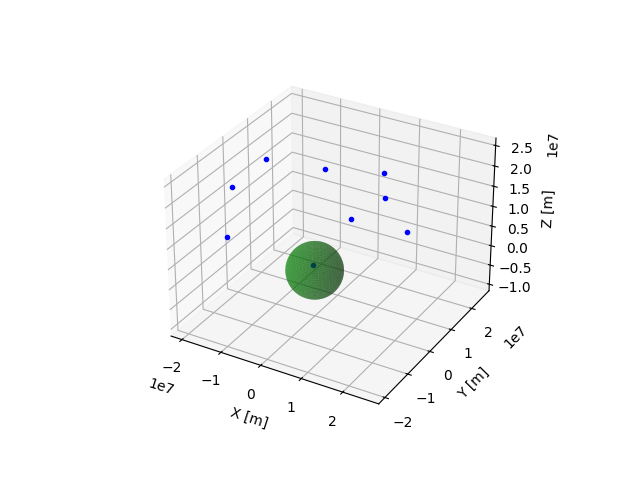

In [5]:
# constants
gpsPi = np.pi  # Pi used in the GPS coordinate system
GM = 3.986005e14  # Universal gravitational constant times the mass of the Earth, [m^3/s^2]
a = 26559800  # [m] semi-major axis

# Satellite parameters
Satellites = [
    {'Name': 'A1', 'e': 0.0, 'i': 55.0, 'Omega': 272.85, 'omega': 0.0, 'Mean_Anomaly': 268.13},
    {'Name': 'A2', 'e': 0.0, 'i': 55.0, 'Omega': 272.85, 'omega': 0.0, 'Mean_Anomaly': 161.79},
    {'Name': 'A3', 'e': 0.0, 'i': 55.0, 'Omega': 272.85, 'omega': 0.0, 'Mean_Anomaly': 11.68},
    {'Name': 'A4', 'e': 0.0, 'i': 55.0, 'Omega': 272.85, 'omega': 0.0, 'Mean_Anomaly': 41.81},
    {'Name': 'B1', 'e': 0.0, 'i': 55.0, 'Omega': 332.85, 'omega': 0.0, 'Mean_Anomaly': 80.96},
    {'Name': 'B2', 'e': 0.0, 'i': 55.0, 'Omega': 332.85, 'omega': 0.0, 'Mean_Anomaly': 173.34},
    {'Name': 'B3', 'e': 0.0, 'i': 55.0, 'Omega': 332.85, 'omega': 0.0, 'Mean_Anomaly': 309.98},
    {'Name': 'B4', 'e': 0.0, 'i': 55.0, 'Omega': 332.85, 'omega': 0.0, 'Mean_Anomaly': 204.38},
    {'Name': 'C1', 'e': 0.0, 'i': 55.0, 'Omega': 32.85, 'omega': 0.0, 'Mean_Anomaly': 111.88},
    {'Name': 'C2', 'e': 0.0, 'i': 55.0, 'Omega': 32.85, 'omega': 0.0, 'Mean_Anomaly': 11.80},
    {'Name': 'C3', 'e': 0.0, 'i': 55.0, 'Omega': 32.85, 'omega': 0.0, 'Mean_Anomaly': 339.67},
    {'Name': 'C4', 'e': 0.0, 'i': 55.0, 'Omega': 32.85, 'omega': 0.0, 'Mean_Anomaly': 241.57},
    {'Name': 'D1', 'e': 0.0, 'i': 55.0, 'Omega': 92.85, 'omega': 0.0, 'Mean_Anomaly': 135.27},
    {'Name': 'D2', 'e': 0.0, 'i': 55.0, 'Omega': 92.85, 'omega': 0.0, 'Mean_Anomaly': 265.45},
    {'Name': 'D3', 'e': 0.0, 'i': 55.0, 'Omega': 92.85, 'omega': 0.0, 'Mean_Anomaly': 35.16},
    {'Name': 'D4', 'e': 0.0, 'i': 55.0, 'Omega': 92.85, 'omega': 0.0, 'Mean_Anomaly': 167.36},
    {'Name': 'E1', 'e': 0.0, 'i': 55.0, 'Omega': 152.85, 'omega': 0.0, 'Mean_Anomaly': 197.05},
    {'Name': 'E2', 'e': 0.0, 'i': 55.0, 'Omega': 152.85, 'omega': 0.0, 'Mean_Anomaly': 302.60},
    {'Name': 'E3', 'e': 0.0, 'i': 55.0, 'Omega': 152.85, 'omega': 0.0, 'Mean_Anomaly': 66.07},
    {'Name': 'E4', 'e': 0.0, 'i': 55.0, 'Omega': 152.85, 'omega': 0.0, 'Mean_Anomaly': 333.69},
    {'Name': 'F1', 'e': 0.0, 'i': 55.0, 'Omega': 212.85, 'omega': 0.0, 'Mean_Anomaly': 238.89},
    {'Name': 'F2', 'e': 0.0, 'i': 55.0, 'Omega': 212.85, 'omega': 0.0, 'Mean_Anomaly': 345.23},
    {'Name': 'F3', 'e': 0.0, 'i': 55.0, 'Omega': 212.85, 'omega': 0.0, 'Mean_Anomaly': 105.21},
    {'Name': 'F4', 'e': 0.0, 'i': 55.0, 'Omega': 212.85, 'omega': 0.0, 'Mean_Anomaly': 135.35}
]

# Simulation parameters
t0 = 0  # start-time
t1 = 12 * 3600  # stop-time
dt = 3600 / 4  # simulation time-step (here 15 minutes)
t = np.arange(t0, t1 + dt, dt)
n = np.sqrt(GM) * (a ** (-3 / 2))

rxt = np.zeros((len(Satellites), 3, len(t)))  # 3d-array to store positions for all 24 SV at each time instant
k = 0
for j in Satellites:  # loop through each SV
    for i in range(len(t)):  # loop through each time-instant
        # Calculate updated anomaly
        M = n * (t[i] - t0) + j['Mean_Anomaly'] * np.pi / 180
        E = M
        iter_max = 1000

        for ii in range(iter_max):
            E_old = E
            E = M + j['e'] * np.sin(E)
            dE = np.remainder(E - E_old, 2 * gpsPi)
            if np.abs(dE) < 1.e-12:
                # Necessary precision is reached, exit from the loop
                break

        r_q = np.array([a * np.cos(E) - a * j['e'], a * np.sqrt(1 - j['e'] ** 2) * np.sin(E), 0])

        # Calculate orbital and ECI coordinates
        R_xq = np.dot(R3(-j['Omega'] * np.pi / 180), np.dot(R1(-j['i'] * np.pi / 180), R3(-j['omega'] * np.pi / 180)))
        r_x = np.dot(R_xq, r_q)
        # Store ECI coordinates
        rxt[k,:,i] = r_x
    k += 1

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-3e7, 3e7)
ax.set_ylim(-3e7, 3e7)
ax.set_zlim(-3e7, 3e7)

for i in range(len(Satellites)):
    if rxt[i,2,0] > R:
        ax.plot3D(rxt[i,0,0], rxt[i,1,0], rxt[i,2,0], 'b.')

#for i in range(len(Satellites)):
#    ax.plot3D(rxt[i,0,0], rxt[i,1,0], rxt[i,2,0], 'r.')


# plot earth
R = 6371000 # m
N = 50
# define Origo
O = np.zeros(3)
# create Earth
theta = np.linspace(0,2*np.pi,N)
phi = np.linspace(0,np.pi,N)
# define x y z for Earth
x = R * np.outer(
    np.cos(theta),
    np.sin(phi)
)
y = R * np.outer(
    np.sin(theta),
    np.sin(phi)
)
z = R * np.outer(
    np.ones(np.size(theta)),
    np.cos(phi)
)
ax.plot_surface(x,y,z,color='green',alpha=0.5)


ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_zlabel('Z [m]')
ax.axis('equal')
plt.grid()
plt.show()

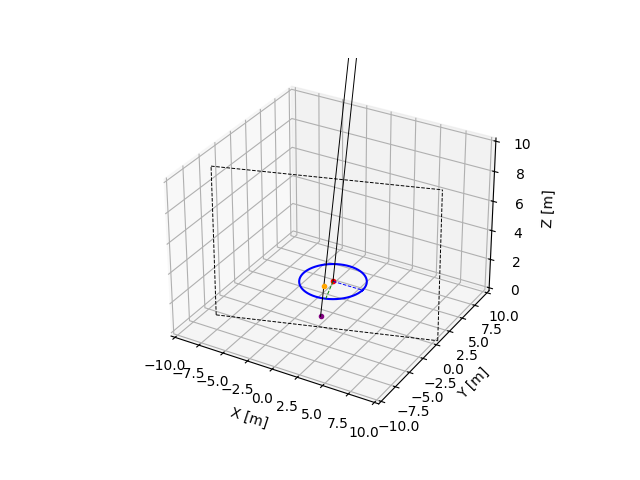

30.382085866049717


In [8]:
# set known statics
h_r = 2
d_w = 3
deg_to_wall = 287
h_w = 10
i = 5

sv = np.zeros_like(rxt[:,:,0])
sv[:] = np.nan
for j in range(len(Satellites)):
    if rxt[j,2,0] > R:
        sv[j,:] = rxt[j,:,0]
        sv[j,2] -= R

sv = sv[~np.isnan(sv)].reshape(-1,3)

r = np.array([0,0,h_r])

theta = np.linspace(0,2*np.pi,360)

dir_wall = np.array([d_w*np.cos(theta[deg_to_wall]),d_w*np.sin(theta[deg_to_wall]), h_r])

wall_midpoint = dir_wall
wall_length = 20
wall_ground_endpoint = dir_wall.copy()
wall_ground_startpoint = dir_wall.copy()
wall_ground_endpoint += wall_length/2 * np.array([-np.sin(theta[deg_to_wall]), 
                                        np.cos(theta[deg_to_wall]),
                                        0])
wall_ground_startpoint -= wall_length/2 * np.array([-np.sin(theta[deg_to_wall]), 
                                        np.cos(theta[deg_to_wall]),
                                        0])
wall_ground_startpoint[2] = 0
wall_ground_endpoint[2] = 0
wall_top_startpoint = wall_ground_startpoint.copy()
wall_top_endpoint = wall_ground_endpoint.copy()
wall_top_startpoint[2] = h_w
wall_top_endpoint[2] = h_w

x_min = min(wall_ground_endpoint[0], wall_top_endpoint[0], wall_ground_startpoint[0], wall_top_startpoint[0])
x_max = max(wall_ground_endpoint[0], wall_top_endpoint[0], wall_ground_startpoint[0], wall_top_startpoint[0])
y_min = min(wall_ground_endpoint[1], wall_top_endpoint[1], wall_ground_startpoint[1], wall_top_startpoint[1])
y_max = max(wall_ground_endpoint[1], wall_top_endpoint[1], wall_ground_startpoint[1], wall_top_startpoint[1])
z_min = min(wall_ground_endpoint[2], wall_top_endpoint[2], wall_ground_startpoint[2], wall_top_startpoint[2])
z_max = max(wall_ground_endpoint[2], wall_top_endpoint[2], wall_ground_startpoint[2], wall_top_startpoint[2])

wall_x_values = np.linspace(x_min, x_max, num=100)
wall_y_values = np.linspace(y_min, y_max, num=100)
wall_z_values = np.linspace(z_min, z_max, num=100)

wall_x, wall_y, wall_z = np.meshgrid(wall_x_values, wall_y_values, wall_z_values, indexing='xy')

## find distance between receiver and wall
# first find x and y values closest
r_dist_xy = np.sqrt((wall_x_values-r[0])**2+(wall_y_values-r[1])**2)#+(wall_z_values-r[2])**2)
idx_xy = np.argmin(r_dist_xy)
# next, find the z value that is closest based on knowledge of xy
r_dist_z = np.sqrt((wall_x_values[idx_xy]-r[0])**2+(wall_y_values[idx_xy]-r[1])**2+(wall_z_values-r[2])**2)
idx_z = np.argmin(r_dist_z)

wall_closest_r = np.array([wall_x[idx_xy,idx_xy,idx_z],wall_y[idx_xy,idx_xy,idx_z],wall_z[idx_xy,idx_xy,idx_z]])
img_r = r+2*(wall_closest_r-r)

a = wall_top_startpoint
b = wall_top_endpoint
c = wall_ground_endpoint

n = np.cross(b-a,c-a)
t = np.dot((c - sv[i,:]), n)/np.dot((img_r-sv[i,:]),n)
intersect_wall = sv[i,:] + t*(img_r-sv[i,:])

# define lines for perpendicular line on wall for intersecting point of signal and direct signal to image receiver
L1_x = np.array([r[0],img_r[0]])
L1_y = np.array([r[1],img_r[1]]) 
L1_z = np.array([intersect_wall[2], intersect_wall[2]])
L2_x = np.array([img_r[0], sv[i,0]])
L2_y = np.array([img_r[1], sv[i,1]])
L2_z = np.array([img_r[2], sv[i,2]])

# find incidence angle of direct signal on wall
angle_rad = angle_3D(L1_x,L1_y,L1_z,L2_x,L2_y,L2_z)
angle_rad = np.pi - angle_rad

phi = np.linspace(0, angle_rad, 100)
r_inc = 0.5
x_arc = intersect_wall[0] + r_inc * np.cos(np.pi*9/10) * np.cos(phi)
y_arc = intersect_wall[1] + r_inc * np.sin(np.pi*9/10) * np.cos(phi)
z_arc = intersect_wall[2] + r_inc * np.sin(phi)


plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot satellites
#for i in range(len(sv)):
#    ax.plot3D(sv[i,0], sv[i,1], sv[i,2], 'b.')
#    ax.plot3D([r[0], sv[i,0]], [r[1], sv[i,1]], [r[2], sv[i,2]], 'k-',linewidth=0.7)

ax.plot3D(sv[i,0], sv[i,1], sv[i,2], 'b.')
# plot receiver
ax.plot3D(r[0],r[1],r[2],'r.')

# plot circle around receiver
ax.plot3D(d_w*np.cos(theta),d_w*np.sin(theta),r[2],'b-')
# plot 0-degree line (should in theory be north)
ax.plot3D([r[0],d_w*np.cos(theta[0])],[r[1],d_w*np.sin(theta[0])],[r[2],r[2]],'b--',linewidth=0.7)

# plot direct signal from sv to receiver
ax.plot3D([r[0], sv[i,0]], [r[1], sv[i,1]], [r[2], sv[i,2]], 'k-',linewidth=0.7)
# plot direction of wall from receiver
ax.plot3D([r[0],dir_wall[0]],[r[1],dir_wall[1]],[r[2],dir_wall[2]],'g--',linewidth=0.7)
## plot perpendicular vector to direction (i.e. the wall)
# bottom line
ax.plot3D([wall_ground_startpoint[0], wall_ground_endpoint[0]], 
          [wall_ground_startpoint[1], wall_ground_endpoint[1]], 
          [wall_ground_startpoint[2], wall_ground_endpoint[2]], 'k--', linewidth=0.7)
# top line
ax.plot3D([wall_top_startpoint[0], wall_top_endpoint[0]], 
          [wall_top_startpoint[1], wall_top_endpoint[1]], 
          [wall_top_startpoint[2], wall_top_endpoint[2]], 'k--', linewidth=0.7)
# left side
ax.plot3D([wall_ground_startpoint[0], wall_top_startpoint[0]], 
          [wall_ground_startpoint[1], wall_top_startpoint[1]], 
          [wall_ground_startpoint[2], wall_top_startpoint[2]], 'k--', linewidth=0.7)
# right side
ax.plot3D([wall_ground_endpoint[0], wall_top_endpoint[0]], 
          [wall_ground_endpoint[1], wall_top_endpoint[1]], 
          [wall_ground_endpoint[2], wall_top_endpoint[2]], 'k--', linewidth=0.7)

# plot image receiver
ax.plot3D(img_r[0],img_r[1],img_r[2],'.',color='purple')
# plot direct signal from sv to receiver
ax.plot3D([img_r[0], sv[i,0]], [img_r[1], sv[i,1]], [img_r[2], sv[i,2]], 'k-',linewidth=0.7)
# plot intersecting point of signal to image receiver on wall
ax.plot3D(intersect_wall[0],intersect_wall[1],intersect_wall[2],'.',color='orange')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_zlabel('Z [m]')
ax.axis('equal')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([0, 10])
plt.grid()
plt.show()

print((np.linalg.norm(img_r - sv[i,:]) - np.linalg.norm(r - sv[i,:])) / 0.19)